In [1]:
''''
Étape 1 : Importer les packages
Étape 2 : Charger les données
Étape 3 : Analyse de données
Étape 4 : Pretraitement des donnees
Étape 5 : Diviser les donnees : Train et Test
Étape 6 : Selection au moins 4 Algorithms de Machine Learning
Étape 7 : Evaluer les modèles
Étape 8 : Faire une simple prediction 
'''

"'\nÉtape 1\xa0: Importer les packages\nÉtape 2\xa0: Charger les données\nÉtape 3\xa0: Analyse de données\nÉtape 4\xa0: Pretraitement des donnees\nÉtape 5\xa0: Diviser les donnees : Train et Test\nÉtape 6\xa0: Selection au moins 4 Algorithms de Machine Learning\nÉtape 7\xa0: Evaluer les modèles\nÉtape 8\xa0: Faire une simple\xa0prediction \n"

# Importer les packages

In [2]:
# Importer les packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn  import metrics
from sklearn.model_selection import train_test_split
# Standardiser les donnees (Les variables independantes)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



import warnings
warnings.filterwarnings('ignore')

# Charger les données

In [3]:
data = pd.read_csv('Book1.csv')
data.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
data.shape

(45211, 17)

# Analyse de données

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Pretraitement des donnees

In [7]:
labeling_Info = LabelEncoder()

In [8]:
data['job'] = labeling_Info.fit_transform(data['job'])
data['marital'] = labeling_Info.fit_transform(data['marital'])
data['education'] = labeling_Info.fit_transform(data['education'])
data['default'] = labeling_Info.fit_transform(data['default'])
data['housing'] = labeling_Info.fit_transform(data['housing'])
data['loan'] = labeling_Info.fit_transform(data['loan'])
data['contact'] = labeling_Info.fit_transform(data['contact'])
data['month'] = labeling_Info.fit_transform(data['month'])
data['poutcome'] = labeling_Info.fit_transform(data['poutcome'])
data['y'] = labeling_Info.fit_transform(data['y'])

In [9]:
data.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,4,1,2,0,101,1,1,2,5,8,426,1,-1,0,3,0
96,55,1,1,1,0,383,0,0,2,5,8,287,1,-1,0,3,0
97,60,5,1,2,0,81,1,0,2,5,8,101,1,-1,0,3,0
98,39,9,1,1,0,0,1,0,2,5,8,203,1,-1,0,3,0


In [10]:
data['job'].unique()


array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [11]:
data['marital'].unique()


array([1, 2, 0])

In [12]:
data['education'].unique()


array([2, 1, 3, 0])

In [13]:
data['default'].unique()


array([0, 1])

In [14]:
data['housing'].unique()


array([1, 0])

In [15]:
data['loan'].unique()


array([0, 1])

In [16]:
data['contact'].unique()


array([2, 0, 1])

In [17]:
data['month'].unique()


array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [18]:
data['poutcome'].unique()


array([3, 0, 1, 2])

In [19]:
data['y'].unique()

array([0, 1])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


<Axes: >

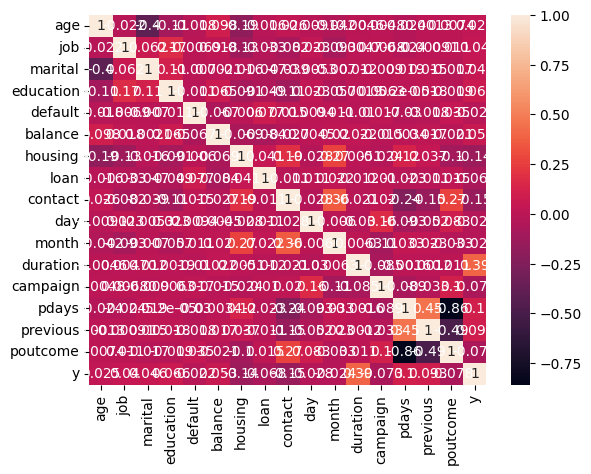

In [21]:
sns.heatmap(data.corr(), annot=True)

In [22]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [23]:
data.corr().y.sort_values(ascending=False)

y            1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

In [24]:
sub_data = data[['age','job','marital','balance','education','previous','pdays','duration','y']]

In [25]:
print(sub_data.shape)
sub_data.head()

(45211, 9)


,age,job,marital,balance,education,previous,pdays,duration,y
0,58,4,1,2143,2,0,-1,261,0
1,44,9,2,29,1,0,-1,151,0
2,33,2,1,2,1,0,-1,76,0
3,47,1,1,1506,3,0,-1,92,0
4,33,11,2,1,3,0,-1,198,0


<Axes: >

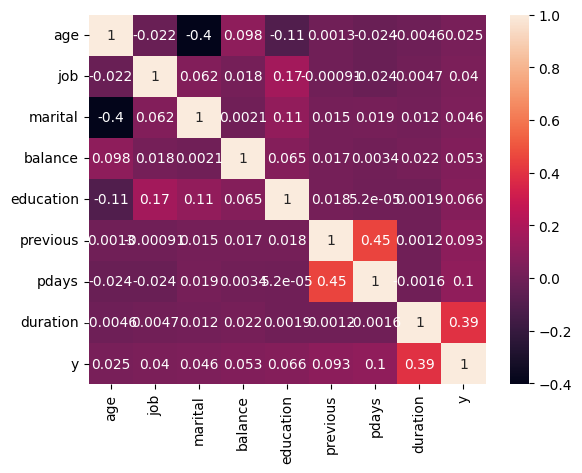

In [26]:
sns.heatmap(sub_data.corr(), annot=True)

# Diviser les donnees : Train et Test

In [27]:
# Diviser les donnees : Train et Test
X = sub_data.iloc[ : , :-1]
y = sub_data.iloc[ : , -1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [29]:
print("X-train Shape:", X_train.shape)
print("y-train Shape:", y_train.shape)
print("X-test Shape:", X_test.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (31647, 8)
y-train Shape: (31647,)
X-test Shape: (13564, 8)
y-test Shape: (13564,)


In [30]:
X_train

,age,job,marital,balance,education,previous,pdays,duration
57,47,1,1,306,3,0,-1,13
32584,24,1,1,9,1,0,-1,468
38362,31,0,0,-254,1,0,-1,237
44798,38,4,1,1477,2,2,769,385
32885,30,4,2,3392,2,0,-1,194
...,...,...,...,...,...,...,...,...
19705,32,4,2,474,2,0,-1,90
15808,28,0,2,579,1,0,-1,60
19391,58,5,1,4,1,0,-1,147
41911,28,4,2,80,2,2,146,676


In [31]:
X_test

,age,job,marital,balance,education,previous,pdays,duration
43897,31,4,2,147,2,3,92,163
5188,47,7,1,4822,3,0,-1,154
24888,49,4,1,-24,2,0,-1,132
13782,33,1,1,17,1,0,-1,489
34158,31,9,2,454,2,0,-1,266
...,...,...,...,...,...,...,...,...
5919,50,7,1,517,1,0,-1,420
40234,29,9,1,858,2,1,330,234
12107,35,4,2,996,2,0,-1,17
27922,45,3,0,31,1,0,-1,280


In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[ 0.5732606 , -1.01929185, -0.27649898, ..., -0.23756129,
        -0.41177865, -0.9527117 ],
       [-1.59815378, -1.01929185, -0.27649898, ..., -0.23756129,
        -0.41177865,  0.80860139],
       [-0.93728853, -1.32464521, -1.91883444, ..., -0.23756129,
        -0.41177865, -0.08560372],
       ...,
       [ 1.61176313,  0.2021216 , -0.27649898, ..., -0.23756129,
        -0.41177865, -0.43399532],
       [-1.22051649, -0.10323176,  1.36583648, ...,  0.56419857,
         1.03573908,  1.61377308],
       [-0.65406057, -1.32464521,  1.36583648, ..., -0.23756129,
        -0.41177865, -0.08560372]])

In [34]:
X_test

array([[-0.93728853, -0.10323176,  1.36583648, ...,  0.96507851,
         0.50399787, -0.37205903],
       [ 0.5732606 ,  0.81282832, -0.27649898, ..., -0.23756129,
        -0.41177865, -0.40689819],
       [ 0.76207925, -0.10323176, -0.27649898, ..., -0.23756129,
        -0.41177865, -0.49206058],
       ...,
       [-0.55965125, -0.10323176,  1.36583648, ..., -0.23756129,
        -0.41177865, -0.93722763],
       [ 0.38444196, -0.40858512, -1.91883444, ..., -0.23756129,
        -0.41177865,  0.08085005],
       [ 0.29003264, -0.71393849, -0.27649898, ...,  0.56419857,
         1.518245  , -0.68948249]])

# 6. Selection au moins 4 Algorithms de Machine Learning

In [35]:
lr_model = LogisticRegression()

In [36]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_predict = lr_model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

from

In [38]:
print("ACCURANCY DE LA REGRESSION LOGISTIQUE :", 100 * accuracy_score(y_test,y_predict))
print ("MSE REGRESSION LOGISTIQUE:",mean_squared_error(y_test,y_predict))

ACCURANCY DE LA REGRESSION LOGISTIQUE : 88.89708050722501
MSE REGRESSION LOGISTIQUE: 0.11102919492774993


[[False False]
 [False False]]


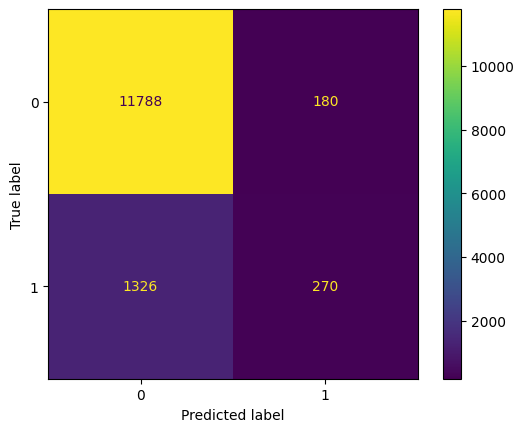

In [39]:
print(confusion_matrix(y_test,y_predict)== ConfusionMatrixDisplay.from_estimator(lr_model,X_test,y_test))

[[False False]
 [False False]]


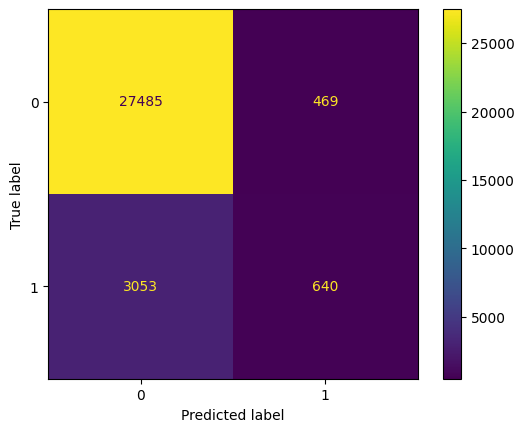

In [40]:
print(confusion_matrix(y_train,y_train)== ConfusionMatrixDisplay.from_estimator(lr_model,X_train,y_train))

In [41]:
model_dr = RandomForestClassifier(n_estimators=150 , criterion='entropy', random_state=150)

In [42]:
model_dr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=150)

In [43]:
predict_dr = model_dr.predict(X_test)
predict_dr

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
print("ACCURANCY  RANDOM :", 100 * accuracy_score(y_test,predict_dr))
print ("MSE DE RANDOM:",mean_squared_error(y_test,predict_dr))

ACCURANCY  RANDOM : 89.7670303745208
MSE DE RANDOM: 0.1023296962547921


In [45]:
KNN_model = KNeighborsClassifier(n_neighbors=150)

In [46]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=150)

In [47]:
knn_predict = KNN_model.predict(X_test)

In [48]:
print("ACCURANCY    KNN :", 100 * accuracy_score(y_test,knn_predict))
print ("MSE DE KNN :",mean_squared_error(y_test,knn_predict))

ACCURANCY    KNN : 88.74225892067237
MSE DE KNN : 0.11257741079327632


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Entraînement
gbc.fit(X_train, y_train)

# Prédiction
predictions = gbc.predict(X_test)

In [50]:
print("ACCURANCY  GradientBoosting :", 100 * accuracy_score(y_test,predictions))
print ("MSE DE GradientBoosting:",mean_squared_error(y_test,predictions))

ACCURANCY  GradientBoosting : 89.7817752875258
MSE DE GradientBoosting: 0.10218224712474197


In [51]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Entraînement
xgb_model.fit(X_train, y_train)

# Prédiction
predictions = xgb_model.predict(X_test)



In [52]:
print("ACCURANCY   xgboost :", 100 * accuracy_score(y_test,predictions))
print ("MSE DE xgboost :",mean_squared_error(y_test,predictions))

ACCURANCY   xgboost : 89.71542317900324
MSE DE xgboost : 0.10284576820996756


In [53]:
# Creer une instance de la Classe Sequential
model = Sequential()

  # Evaluer les modèles

# Faire une simple prediction